Tasks

- remove NA values?

- convert LCL to height? or convert PBL to pressure? 

- plot a diurnal cycle for BL height

In [150]:
import pandas as pd
import glob
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from pyhdf import SD
import numpy as np
import math
import pickle
import pint
from pydoc import help
from pyhdf.SD import *
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
%matplotlib inline

In [2]:
# Set display options to show all rows and columns in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
def time_adjustment(file):
    bt = file.variables["base_time"].data
    t = file.coords["time"].data[0]
    t_off = file.variables["time_offset"].data[0]
    
    bt = pd.Timestamp(bt)
    t_off = pd.Timestamp(t_off)
    
    yr = bt.year
    month = bt.month
    day = bt.day
    
    if bt.hour == 0 and bt.minute == 0 and bt.second == 0:
        hr = t_off.hour
        minute = t_off.minute
        second = t_off.second
    else:
        hr = bt.hour
        minute = bt.minute
        second = bt.second
    
    time_final = (yr, month, day, hr, minute, second)
    time_final = datetime.datetime(*time_final)

    return(time_final)

In [25]:
def assign_season(month):
    if month in [3,4,5]:
        return 'MMA'
    elif month in [6,7,8]:
        return 'JJA'
    elif month in [9,10,11]:
        return 'SON'
    else:
        return 'DJF'

In [ ]:
#loop to read in pblht data
pblht_files = []
path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1"
pblht_list = sorted(glob.glob(path + "/*.cdf"))
for file in pblht_list:
    s = xr.open_dataset(file)
    print(s.encoding['source'])
    pblht_files.append(s)

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010401.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010401.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010401.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010402.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010402.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010402.203100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010402.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010403.052900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010421.203100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010421.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010422.053500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010422.113800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010422.202600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010422.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010423.053100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010423.113100.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010509.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010509.203100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010509.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010510.053100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010510.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010510.203000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010510.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010511.052900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010530.203000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010530.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010531.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010531.113600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010531.202900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010531.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010601.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010601.112800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010620.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010620.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010620.203000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010620.210600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010620.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010621.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010621.113400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010621.202800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010708.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010708.203000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010708.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010709.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010709.113200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010709.233500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010710.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010710.113000.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010726.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010727.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010727.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010727.202700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010727.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010728.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010728.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010728.202700.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010813.113400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010813.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010814.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010814.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010814.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010814.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010815.175000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010815.232700.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010903.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010903.113100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010903.172300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010903.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010904.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010904.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010904.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010904.232700.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010922.173900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010922.233900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010923.053900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010923.113900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010923.173700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010923.233900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010924.053900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20010924.113500.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011016.143400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011016.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011016.232400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011017.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011017.112300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011017.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011017.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011018.053100.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011102.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011102.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011102.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011103.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011103.114800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011104.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011104.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011104.172900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011122.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011122.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011122.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011123.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011123.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011123.172600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011123.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011124.053600.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011209.112500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011210.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011210.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011211.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011211.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011211.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011211.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011212.053200.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011228.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011228.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011228.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011229.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011229.112200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011229.172400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011229.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20011230.052800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020115.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020115.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020115.232500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020116.052400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020116.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020116.115000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020116.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020116.232800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020219.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020220.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020220.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020220.174700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020220.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020221.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020221.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020221.172800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020313.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020313.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020314.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020314.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020314.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020314.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020315.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020315.112900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020401.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020401.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020402.053100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020402.113200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020402.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020402.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020403.053100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020403.115100.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020419.172600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020419.232500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020420.052600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020420.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020420.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020420.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020421.053400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020421.112600.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020507.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020507.173400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020507.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020508.052200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020508.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020508.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020508.234100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020509.173600.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.022900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.082900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.142200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.202900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020526.232900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020606.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.022900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.082800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.113100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.142900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020607.202900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020615.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020616.052100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020616.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020616.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020616.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020617.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020617.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020617.172800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020703.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020703.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020704.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020704.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020704.172400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020704.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020705.053300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020705.112300.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020722.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020722.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020722.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020723.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020723.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020723.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020723.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020724.052900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020809.173700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020809.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020810.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020810.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020810.172600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020810.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020811.052600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020811.112700.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020827.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020828.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020828.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020828.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020828.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020829.052600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020829.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020829.172900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020914.111900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020914.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020914.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020915.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020915.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020915.173700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020915.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20020916.052800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021002.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021002.232600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021003.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021003.112000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021003.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021003.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021004.052400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021004.112500.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021021.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021021.172400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021021.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021022.054000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021022.113100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021022.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021022.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021023.052900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.052700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.082700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.112400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.142500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.172600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.202500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021107.232500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021108.022800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021116.172600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021116.202500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021116.232500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021117.022700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021117.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021117.082700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021117.112600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021117.142400.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021125.202600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021125.232700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.022600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.052600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.082700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021126.232600.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021212.112300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021212.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021212.232900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021213.052800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021213.112100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021213.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021213.232800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20021214.052800.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030101.053200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030101.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030101.173500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030102.053200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030102.113100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030102.173300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030102.233300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030103.053300.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030121.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030121.173400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030121.233200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030122.053500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030122.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030122.173300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030122.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030123.053600.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030209.053200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030209.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030209.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030209.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030210.053500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030210.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030210.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030211.053000.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030226.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030227.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030227.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030227.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030227.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030228.053600.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030228.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030228.173100.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030314.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030315.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030315.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030315.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030315.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030316.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030316.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030316.172700.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030404.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030404.233200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030405.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030405.113100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030405.172900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030405.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030406.113800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030406.172900.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030425.053900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030425.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030425.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030425.233200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030426.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030426.112900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030426.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030426.233000.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030515.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030516.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030516.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030516.173200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030516.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030517.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030517.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030517.175500.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030608.113200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030608.172700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030608.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030609.053200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030609.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030609.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030609.175200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030609.233000.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030628.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030628.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030628.233500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030629.053200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030629.115400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030629.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030629.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030630.053000.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030720.113300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030720.233000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030721.053700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030721.114300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030721.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030722.053000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030722.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030722.173100.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030808.112800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030808.173000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030808.233200.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030809.052900.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030809.112700.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030809.172800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030809.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030810.053300.cdf
/data/rong1/clim

/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030827.120500.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030827.233100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030828.053400.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030828.113000.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030828.173100.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030828.233300.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030829.053800.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/annie_pblht/sgppblhtsonde1mcfarlC1.c1/sgppblhtsonde1mcfarlC1.c1.20030829.114300.cdf
/data/rong1/clim

In [11]:
pblhts = []
for file in pblht_files:
    time = time_adjustment(file)
    pblht = file.variables["pbl_height_liu_liang"].data - 315
    tuple = (time,pblht)
    pblhts.append(tuple)

In [133]:
pbdf = pd.DataFrame(pblhts, columns=['time','height'])

In [134]:
pbdf = pbdf.set_index("time")

#converts date column to Oklahoma time 
pbdf.index = pd.to_datetime(pbdf.index)
pbdf.index = pbdf.index - datetime.timedelta(hours=6)

pbdf = pbdf.sort_index()

pbdf['year'] = pbdf.index.year
pbdf['month'] = pbdf.index.month
pbdf['day'] = pbdf.index.day
pbdf['hour'] = pbdf.index.hour

In [135]:
pbdf11 = pbdf[pbdf['hour'] == 11]
pbdf11['season'] = pbdf11['month'].apply(assign_season)

/tmp/ipykernel_11774/3791704570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbdf11['season'] = pbdf11['month'].apply(assign_season)


In [136]:
meanpblht = pbdf11.groupby(['year','season'])['height'].agg(['mean','count']).rename(columns={'mean': 'mean_pblht', 'count': 'count_values'})
meanpblht = pd.DataFrame(meanpblht).reset_index()

In [145]:
jja_df = meanpblht[meanpblht['season'] == 'JJA'].reset_index()
mma_df = meanpblht[meanpblht['season'] == 'MMA'].reset_index()
son_df = meanpblht[meanpblht['season'] == 'SON'].reset_index()
djf_df = meanpblht[meanpblht['season'] == 'DJF'].reset_index()
all_pblht_seasons = [jja_df, mma_df, son_df, djf_df]

In [155]:
with open('mma_df.pkl', 'wb') as file:
    pickle.dump(mma_df, file)
with open('son_df.pkl', 'wb') as file:
    pickle.dump(son_df, file)
with open('djf_df.pkl', 'wb') as file:
    pickle.dump(djf_df, file)

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot: title={'center': 'Average Boundary Layer Height'}, xlabel='Year', ylabel='Above Ground Level (m)'>>

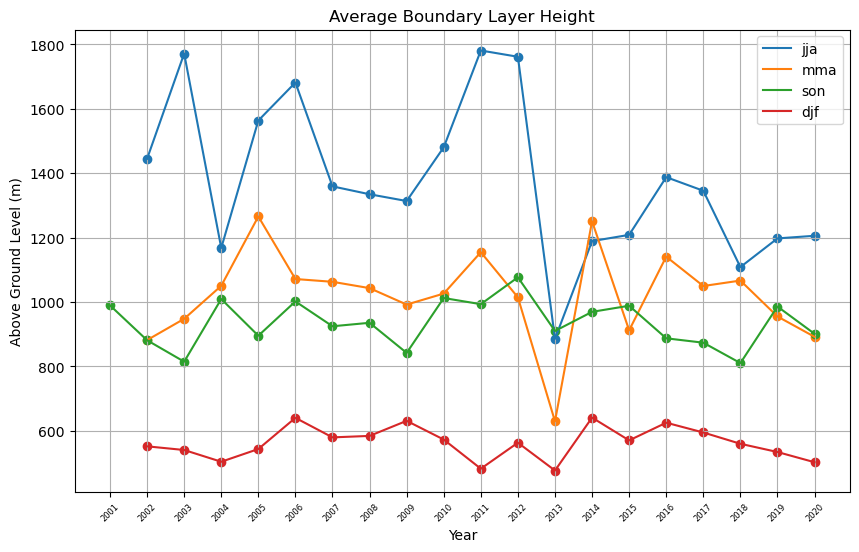

In [149]:
#36.605 = lat, -97.485 = lon
fig, ax = plt.subplots(figsize=(10, 6))

seasons = ['jja', 'mma', 'son', 'djf']

# Iterate over each season's DataFrame
for i, season_df in enumerate([jja_df, mma_df, son_df, djf_df]):
    season_df = season_df[season_df['count_values'] > 30]
    plt.scatter(season_df['year'], season_df['mean_pblht'])
    plt.plot(season_df['year'], season_df['mean_pblht'],label=seasons[i])
# Customize the plot
plt.grid(True)
ax.legend()
ax.set_title("Average Boundary Layer Height")
plt.xticks(jja_df['year'], rotation=45, fontsize=6)
ax.set_xlabel('Year')
ax.set_ylabel('Above Ground Level (m)')
ax.set

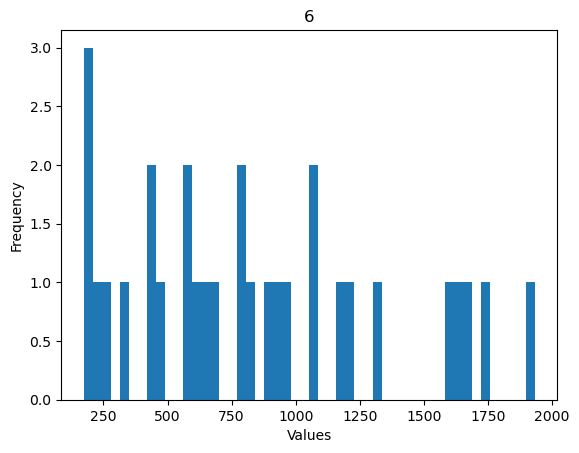

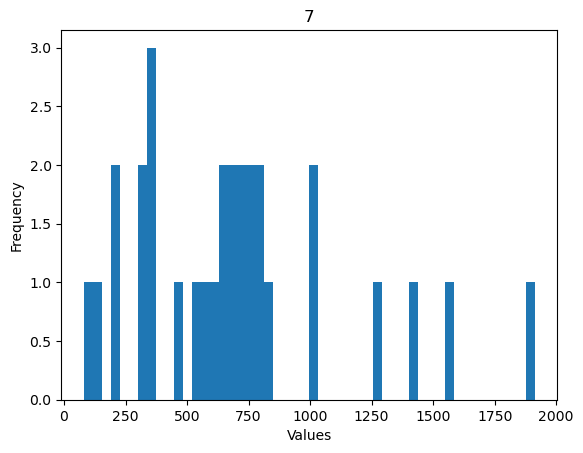

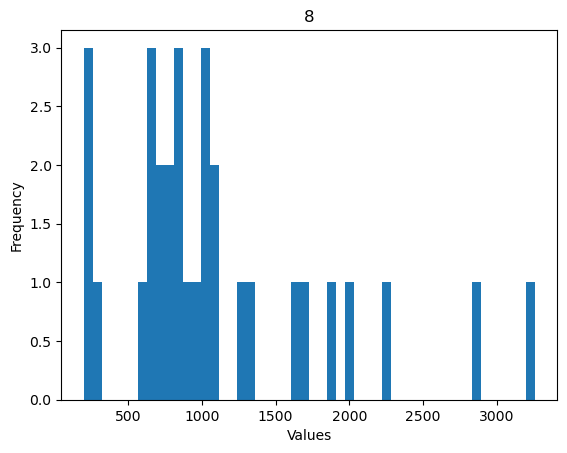

In [130]:
#checking distribution of 2013 JJA to determine why so low
#distributions look even across months

pbdf1113 = pbdf11[(pbdf11['year'] == 2013) & (pbdf11['season'] == "JJA")]
months = [6,7,8]
for month in months:
    df = pbdf1113[pbdf1113["month"] == month]
    plt.hist(df['height'], bins=50)  # Using 5 bins for this example

    # Customize the labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(month)

    # Display the plot
    plt.show()

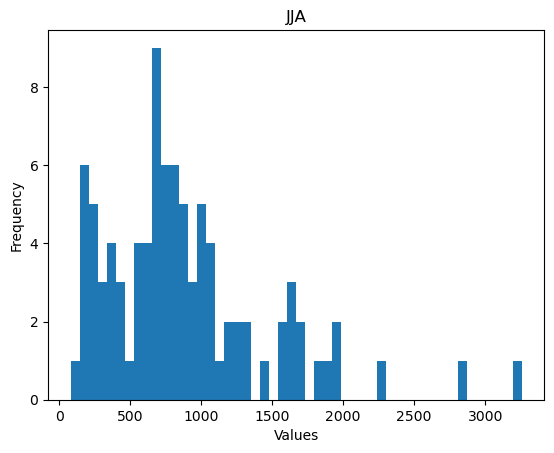

In [144]:
#checking distribution of 2013 JJA to determine why so low
#distributions look even across months

season = "JJA"
pbdf1113 = pbdf11[(pbdf11['year'] == 2013) & (pbdf11['season'] == season)]

plt.hist(pbdf1113['height'], bins=50)  # Using 5 bins for this example

# Customize the labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(season)

# Display the plot
plt.show()